# paddleOCR — Evaluation & Debug Notebook  
**Author:** Manel

## Purpose
Evaluate paddleOCR on document pages (PDF → images) with:
- Visual inspection (original + preprocessed)
- OCR text preview
- Word-level bounding boxes and confidence
- Quick sweeps over preprocessing + `psm` layouts


In [1]:
!pip install paddleocr paddlepaddle


[notice] A new release of pip is available: 23.3.2 -> 26.0
[notice] To update, run: C:\Users\manel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#### Imports

In [ ]:
import os
from pathlib import Path
from typing import List, Dict, Any
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
from paddleocr import PaddleOCR
import os
from IPython.display import display
import pandas as pd
from pytesseract import Output
import numpy as np
from PIL import Image, ImageOps, ImageEnhance

C:\Users\manel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Checking connectivity to the model hosters, this may take a while. To bypass this check, set `PADDLE_PDX_DISABLE_MODEL_SOURCE_CHECK` to `True`.


#### Paths

In [6]:
BASE_DIR = Path.cwd()  # ...\DocumentAgent\Notebooks
DATA_DIR = BASE_DIR.parent / "data" / "images"

#### Display Helpers

In [7]:
def show(img, title=None, figsize=(10, 12)):
    if isinstance(img, (str, Path)):
        img = Image.open(img)
    plt.figure(figsize=figsize)
    cmap = "gray" if img.mode in ["L", "1"] else None
    plt.imshow(img, cmap=cmap)
    plt.axis("off")
    if title:
        plt.title(title)
    plt.show()

def crop(img, x1, y1, x2, y2):
    if isinstance(img, (str, Path)):
        img = Image.open(img)
    return img.crop((x1, y1, x2, y2))

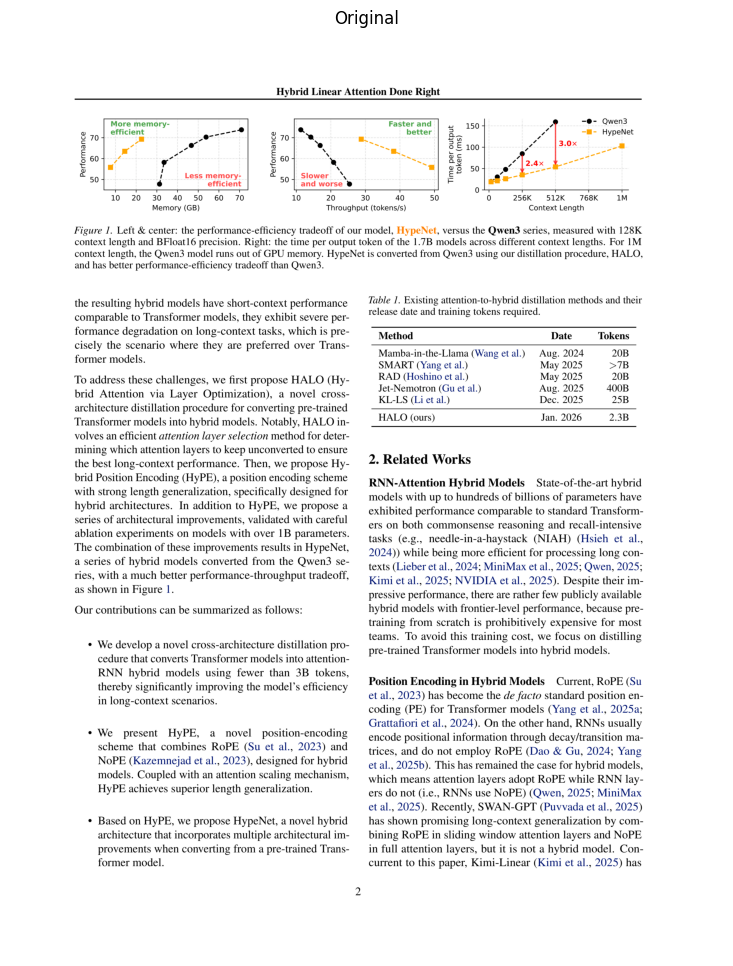

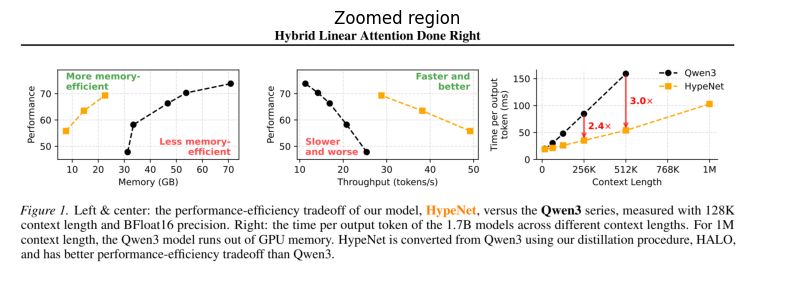

In [8]:
# Example usage
DEFAULT_IMAGE = DATA_DIR / "page_2.png"
show(DEFAULT_IMAGE, "Original")
show(crop(DEFAULT_IMAGE, 200, 200, 2400, 900), "Zoomed region")

#### Set paddleOCR

In [9]:
ocr = PaddleOCR(lang='en')

C:\Users\manel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\paddle\utils\cpp_extension\extension_utils.py:712: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in `C:\Users\manel\.paddlex\official_models\PP-LCNet_x1_0_doc_ori`.
[2026-02-01 19:47:39,631] [    INFO] _client.py:1025 - HTTP Request: GET https://huggingface.co/api/models/PaddlePaddle/PP-LCNet_x1_0_doc_ori/revision/main "HTTP/1.1 200 OK"
Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s][2026-02-01 19:47:39,795] [    INFO] _client.py:1025 - HTTP Request: HEAD https://huggingface.co/PaddlePaddle/PP-LCNet_x1_0_doc_

In [10]:
result = ocr.predict(image_path=str(DEFAULT_IMAGE), cls=True)

TypeError: PaddleOCR.predict() got an unexpected keyword argument 'image_path'